In [1]:
conda install -c conda-forge wfdb

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\Stefan\anaconda3

  added / updated specs:
    - wfdb


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39hcbf5309_1         1.0 MB  conda-forge
    libflac-1.3.4              |       h0e60522_0         355 KB  conda-forge
    libogg-1.3.4               |       h8ffe710_1          34 KB  conda-forge
    libopus-1.3.1              |       h8ffe710_1         255 KB  conda-forge
    libsndfile-1.0.31          |       h0e60522_1         354 KB  conda-forge
    libvorbis-1.3.7            |       h0e60522_0         267 KB  conda-forge
    pysoundfile-0.10.3.post1   |     pyhd3deb0d_0          23 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    wfdb-4.0.0                 |     pyhd8ed1ab_0         123 KB  conda-forge
    

In [2]:
import wfdb
import matplotlib.pyplot as plt
import random
from scipy.io import savemat
import os
import csv


In [3]:
# path to the files 
path = 'more_data/mitbih-afib/files/'

In [4]:
record = wfdb.rdrecord(path+'04043')
atr = wfdb.rdann(path+'04043','atr')

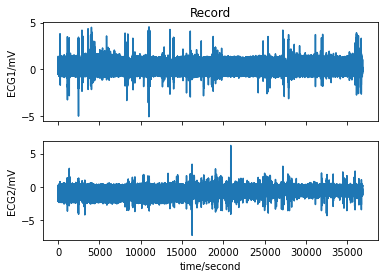

{'record_name': '04043',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 9205760,
 'base_time': datetime.time(15, 0),
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': array([[-0.415, -0.395],
        [-0.415, -0.26 ],
        [-0.43 , -0.185],
        ...,
        [ 0.175, -0.14 ],
        [ 0.08 , -0.16 ],
        [-0.03 , -0.25 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['04043.dat', '04043.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-83, -79],
 'checksum': [3080, -14988],
 'block_size': [0, 0]}

In [5]:
wfdb.plot_wfdb(record=record, title='Record') 
display(record.__dict__)

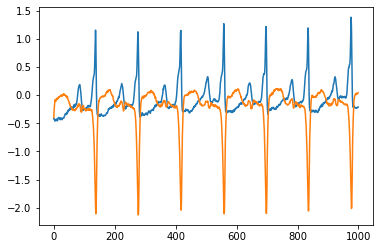

In [6]:
ecg_signal = record.p_signal
ecg_signal1 = ecg_signal[:,0]

plt.plot(ecg_signal[0:1000])

In [7]:
sample = atr.sample
label  = atr.aux_note

In [8]:
print(len(sample))
print(len(label))
print(label)
print(sample)

166
166
['(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '

In [9]:
#import all data
records = []
labels = []
timestemps = []
record_names = ['04015','04048','04126','04746','04908','04936','05091','05121','05261','06426','06453','06995','07162','07859','07879','07910','08215','08219']

for name in record_names:
    record = wfdb.rdrecord(path + name)
    atr = wfdb.rdann(path + name,'atr')
    ecg1 = record.p_signal[:,0]
    ecg2 = record.p_signal[:,1]
    label = atr.aux_note
    timestemp = atr.sample
    records.append(ecg1)
    records.append(ecg2)
    timestemps.append(timestemp)
    timestemps.append(timestemp)
    labels.append(label)
    labels.append(label)

In [10]:
print(len(records))

36


In [11]:
#create segments
segments = []
segments_label = []

for j in range(len(records)):
    for i in range(len(labels[j])-1):
        segments.append(records[j][timestemps[j][i]:timestemps[j][i+1]])
        if(labels[j][i] == '(N'):
            segments_label.append('N')
        elif(labels[j][i] == '(AFIB'):
            segments_label.append('A')
        else: 
            print('Unknown label!' + str(labels[j][i]))
            segments_label.append('O')
    

Unknown label!(AFL
Unknown label!(AFL
Unknown label!(AFL
Unknown label!(AFL
Unknown label!(AFL
Unknown label!(AFL
Unknown label!(AFL
Unknown label!(AFL
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(AFL
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(AFL
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(J
Unknown label!(AFL
Unknown label!(AFL
Unknown label!(AFL
Unknown label!(AFL
Unknown label!(J
Unknown label!(J
Unknown label!(AFL
Unknown label!(AFL
Unknown label!(AFL
Unknown label!(AFL


In [12]:
#length of recordings that I want to create, similar to the length of recordings in the original trainingsset
min_duration = 9
max_duration = 60

In [13]:
signals = []
signals_label = []
fs = 250
for i in range(len(segments)):
    current_segment = segments[i]
    current_label   = segments_label[i]
    while(len(current_segment) > fs*max_duration):
        time = random.randrange(min_duration,max_duration+1)
        new_signal = current_segment[0:fs*time]
        current_segment = current_segment[fs*time:-1]
        signals.append(new_signal)
        signals_label.append(segments_label[i])
    
print(len(signals))
print(len(signals_label))

24031
24031


Text(0.5, 1.0, 'A')

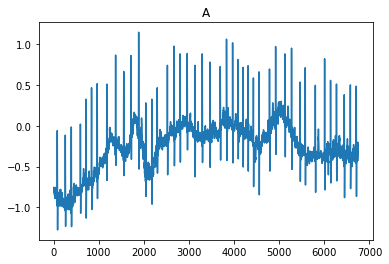

In [14]:
index = 20000
plt.plot(signals[index])
plt.title(signals_label[index])

In [15]:
print(signals_label)

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

In [16]:
#create directory
try: 
    os.makedirs('ProcessedData/MIT-AtrialFibrillation')
except:
    print('Directory already exists')

In [17]:
#clear directory
for file in os.listdir('ProcessedData/MIT-AtrialFibrillation'):
        os.remove(os.path.join('ProcessedData/MIT-AtrialFibrillation', file))

#save .mat files        
for i in range(len(signals)):
    mdic = {'val': signals[i]}
    savemat('ProcessedData/MIT-AtrialFibrillation/MITAtrialFibirallation'+str(i)+'.mat', mdic)

In [18]:
with open('ProcessedData/MIT-AtrialFibrillation/REFERENCE.csv', 'w') as file:
    writer = csv.writer(file,lineterminator = '\n')
    rows = []
    for i in range(len(signals_label)):
         rows.append(['MITAtrialFibirallation'+str(i),str(signals_label[i])])
    writer.writerows(rows)